### Simple Linear Regression

In [29]:
# importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [30]:
#  import warnings to ignore warnings

import warnings 
warnings.filterwarnings("ignore")

In [31]:
# importing dataset

dataset = pd.read_csv("salary_data.csv")
dataset
dataset4 = pd.read_csv("dataset2.csv")

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [32]:
# print dataset

dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [33]:
# print (years of experience) 

x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [34]:
# print (salary)

y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [35]:
# splitting dataset into training and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)
print(x_train,x_test,y_train,y_test)

[[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]] [[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]] [112635.  55794.  83088. 101302.  56642.  66029.  64445.  61111. 113812.
  91738.  46205. 121872.  60150.  39891.  81363.  93940.  57189.  54445.
 105582.  43525.  39343.  98273.  67938.  56957.] [ 37731. 122391.  57081.  63218. 116969. 109431.]


In [36]:
# training the simple linear regression model on training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [37]:
# predicting the test set result

y_pred = regressor.predict(x_test)
print(y_pred)
print(dataset4)

# predicting the new result with 10,20,25,45,50 years of experience

new1_data = dataset4
y_pred = regressor.predict(new1_data)
print(y_pred)

new_data= np.array([10,20,25,45,50]).reshape(-1,1)
y_pred = regressor.predict(new_data)
print(y_pred)

y_pred = regressor.predict(new_data)
df= pd.DataFrame(y_pred,columns=["Salary"]).to_csv
print(df)


[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]
   years of experience 
0                    10
1                    20
2                    25
3                    45
4                    50
[119905.85041792 213031.60168521 259594.47731886 445845.97985344
 492408.85548709]
[119905.85041792 213031.60168521 259594.47731886 445845.97985344
 492408.85548709]
<bound method NDFrame.to_csv of           Salary
0  119905.850418
1  213031.601685
2  259594.477319
3  445845.979853
4  492408.855487>


In [38]:
# predicting the salary of an employee with 10 years of experience

y_pred = regressor.predict([[10]])
print(y_pred)

[119905.85041792]


In [39]:
# predicting the salary of an employee with 50 years of experience

y_pred = regressor.predict([[50]])
print(y_pred)

[492408.85548709]


In [40]:
# predicting the salary of an employee with 9 years of experience

y_pred = regressor.predict([[9]])
print(y_pred)

[110593.27529119]


In [41]:
# evaluating the model performance using r2_score

y_pred = regressor.predict(x_test)
from sklearn.metrics import r2_score
acc = r2_score(y_pred,y_test)
acc


0.986482673117654

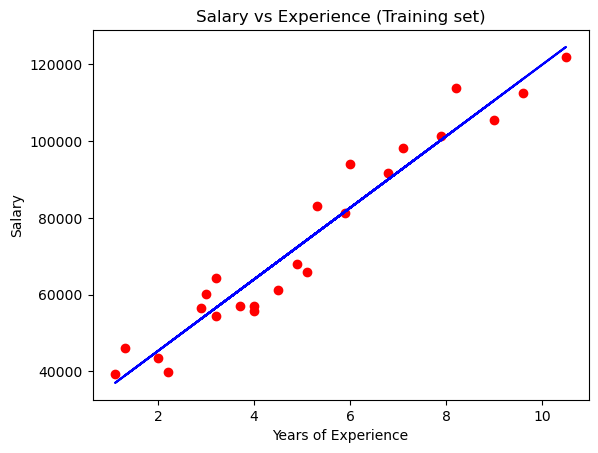

In [42]:
# visualising the training set result

plt.scatter(x_train, y_train, color ='red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel ('Years of Experience')
plt.ylabel('Salary')
plt.show()
